In [462]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import math

import statistics as stat
from sklearn.neural_network import MLPRegressor



Seguimos el hilo argumental del [ejercicio 9.1](https://github.com/Gerard-Bonet/Sprint9Tasca1.git) para trabajar con el 9.2. No nos servirán las variables del ejercicio 9.1, ya que 

no dividimos el conjunto de datos  en variables independientes y objetivos. Es decir, no vamos a aprobechar nada de él pero si 

alguna información, que vamos a pasar a resumir:



In [556]:
df = pd.read_csv("DelayedFlights.csv") # este es el conjunto de datos proporcionado en el ejercicio 
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


- Las variables DepTime','CRSDepTime', 'ArrTime', 'CRSArrTime" básicamente son las horas programadas y reales que acaban determinando 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay','DepDelay'. Restar  'ArrTime' y 'CRSArrTime nos da ArrDelay, por ejemplo. Mientras en el otro ejercicio, no nos hicieron falta, para entrenar una red neuronal o un arbol, nos pueden venir bien si no contamos con la variable DepDelay( Ejercicio 3)

- Las variables "CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay" tienen un tercio de valores NaN, y la suma de todas es el retraso general. 

- 'FlightNum' y'TailNum' son variables catogóricas que no aportan mucho 

- "ActualElapsedTime",  "CRSElapsedTime","AirTime" y "Distance" tienen un coeficiente de correlación lineal entre ellas cercano a 0,95 $\pm 2$ , mientras que ArrDelay y DepDelay, tienen una correlación cercana a cero respecto a estas 4 variables. 

- Arrdelay y DepDelay tienen una correlación cercana a 0,8. 

- Entre el primer grupo(distance) y el segundo(arrdelay) el Coeficiente de correlación tiende a cero


- los aeropuertos donde hay más vuelos hay más minutos acumulados de retrasos. No crece de manera lineal, va creciendo de forma $ax^2 +bx$ de forma muy aplanada. Ésto estaba por corroborar. 

- Con las compañías crece de forma lineal. A más vuelos, más minutos acumulados de retrasos. 

- Ignoraré las variables Cancelled o Diverted ya que si tienen un valor de 1 ( y no llegan a 8000 casos) tienen valores NaN en ArrDelay y DepDelay





0. **PREPROCESAMIENTO DE DATOS.** 

Vamos a dedicar esta parte a tratar las variables con valores perdidos, transformación de estas variables, selección, y otras 

manipulaciones para poder aplicar a las regresiones 

In [464]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

0.1. **Muestreo de población y tratamiento de valores perdidos**

Primero hacemos un **muestreo de la población** para evitar problemas de memoria, ya que al hacer ciertas operaciones

sobre todo el conjunto de datos, el ordenador da problemas de memoria, incluso vectorizando 


In [557]:
df1= df.sample(390000)# el 20% aproximadamente 
df1.isnull().sum()# miramos la cantidad de valores perdidos

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                1417
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   1
ActualElapsedTime      1691
CRSElapsedTime           48
AirTime                1691
ArrDelay               1691
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 1417
TaxiOut                  83
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         138218
WeatherDelay         138218
NASDelay             138218
SecurityDelay        138218
LateAircraftDelay    138218
dtype: int64

Como hicimos en la [ejercicio 9.1](https://github.com/Gerard-Bonet/Sprint9Tasca1.git) vamos a ver si estos valores NaN corresponden a vuelos cancelados o derivados, que no van a servir de nada para calcular el valor de ArrDelay

In [562]:
# vamos a ver si todos los valores NaN corresponden a todos lo vuelos Cancelados o Derivados 
df1_div= df1[df1["Diverted"]==1]
df1_can=df1[df1["Cancelled"]==1]
df1_div.shape#número de vuelos desviados

(1568, 30)

In [563]:
df1_can.shape#número de vuelos cancelados

(123, 30)

In [564]:
df1_div.shape[0]+df1_can.shape[0]# número total de cancelados y derivados. 

1691

In [565]:
df1_div["ArrTime"].isnull().sum()+df1_can["ArrTime"].isnull().sum()# que coincide con los valores NaN de ArrTime

1417

In [566]:
df1_div["ActualElapsedTime"].isnull().sum()+df1_can["ActualElapsedTime"].isnull().sum()# esto daría lo mismos 
# para ArrDelay y DepDelay

1691

Los valores NaN, coinciden con aquellos que el vuelos ha sido Cancelado o Desviado,por lo tanto, no aportan información 

al cálculo de la regresión de ArrDelay, optamos por eliminarlos

In [567]:
df2=df1.dropna( subset=["ArrDelay"]).reset_index(drop=True)
df2.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   1
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         136527
WeatherDelay         136527
NASDelay             136527
SecurityDelay        136527
LateAircraftDelay    136527
dtype: int64

0.2. **Transformación de variables horarias**

En esta parte vamos a convertir las variables DepTime,	CRSDepTime,	ArrTime,	CRSArrTime en la función cíclica. 

Estas cuatro variables vienen en formato horario  hh:mm. Lo que haremos será contar todos los minutos transcurridos durante 

el día, siendo 0 minutos a las 00:00 y 1440 los minutos transcurridos durante el día a las 23:59.

Más adelante, en el apartado 0.4, transformaremos estas variables en cíclicas. 







In [568]:
# Primero de todo convierto las variables horarias en formato hora y para eso tienen que haber 4 digítos, que los relleno por la
#izquierda con ceros
# Primero tengo que convertir en entero las variables DepTime y ArrTime en enteros para evitar los decimales


df2['DepTime'] = df2['DepTime'].astype(int)



In [569]:

df2['ArrTime'] = df2['ArrTime'].astype(int)
df2

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1238042,2008,3,21,5,1539,1515,1635,1615,WN,...,2.0,8.0,0,N,0,5.0,0.0,0.0,0.0,15.0
1,3136421,2008,6,16,1,1159,1125,1349,1245,YV,...,3.0,42.0,0,N,0,0.0,0.0,30.0,0.0,34.0
2,5390869,2008,10,5,7,1923,1915,2019,2015,WN,...,3.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,708931,2008,2,26,2,1612,1600,1853,1818,XE,...,7.0,29.0,0,N,0,0.0,0.0,23.0,0.0,12.0
4,4714155,2008,8,3,7,1742,1710,2053,2020,AA,...,10.0,45.0,0,N,0,0.0,0.0,19.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388304,2637037,2008,5,9,5,1500,1446,1638,1629,UA,...,6.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
388305,4174570,2008,7,20,7,2108,2000,113,2253,B6,...,8.0,106.0,0,N,0,4.0,0.0,136.0,0.0,0.0
388306,4723413,2008,8,1,5,939,850,1137,1050,AA,...,13.0,10.0,0,N,0,4.0,0.0,0.0,0.0,43.0
388307,4603816,2008,8,18,1,1415,1408,1535,1541,FL,...,7.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [570]:
#relleno por la izquierda con ceros
df2['DepTime'] = df2['DepTime'].astype(str).str.zfill(4)
df2['CRSDepTime'] = df2['CRSDepTime'].astype(str).str.zfill(4)
df2['ArrTime'] = df2['ArrTime'].astype(str).str .zfill(4)
df2['CRSArrTime'] = df2['CRSArrTime'].astype(str).str.zfill(4)
df2.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1238042,2008,3,21,5,1539,1515,1635,1615,WN,...,2.0,8.0,0,N,0,5.0,0.0,0.0,0.0,15.0
1,3136421,2008,6,16,1,1159,1125,1349,1245,YV,...,3.0,42.0,0,N,0,0.0,0.0,30.0,0.0,34.0
2,5390869,2008,10,5,7,1923,1915,2019,2015,WN,...,3.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,708931,2008,2,26,2,1612,1600,1853,1818,XE,...,7.0,29.0,0,N,0,0.0,0.0,23.0,0.0,12.0
4,4714155,2008,8,3,7,1742,1710,2053,2020,AA,...,10.0,45.0,0,N,0,0.0,0.0,19.0,0.0,14.0


In [571]:
# las convierto en formato horario( Nota: en un principio lo pasé a formato horario por si lo necesitaba para datetime, pero 
# al final opté por otro tipo de conversión)
df2['DepTime'] = df2['DepTime'].astype(str).str[:2]  + ':' + df2['DepTime'].astype(str).str[2:4] + ':00' 
df2['CRSDepTime'] = df2['CRSDepTime'].astype(str).str[:2] + ':' + df2['CRSDepTime'].astype(str).str[2:4] + ':00' 
df2['ArrTime'] = df2['ArrTime'].astype(str).str[:2] + ':' + df2['ArrTime'].astype(str).str[2:4]  + ':00'
df2['CRSArrTime'] = df2['CRSArrTime'].astype(str).str[:2] + ':' + df2['CRSArrTime'].astype(str).str[2:4] + ':00'


df2

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1238042,2008,3,21,5,15:39:00,15:15:00,16:35:00,16:15:00,WN,...,2.0,8.0,0,N,0,5.0,0.0,0.0,0.0,15.0
1,3136421,2008,6,16,1,11:59:00,11:25:00,13:49:00,12:45:00,YV,...,3.0,42.0,0,N,0,0.0,0.0,30.0,0.0,34.0
2,5390869,2008,10,5,7,19:23:00,19:15:00,20:19:00,20:15:00,WN,...,3.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,708931,2008,2,26,2,16:12:00,16:00:00,18:53:00,18:18:00,XE,...,7.0,29.0,0,N,0,0.0,0.0,23.0,0.0,12.0
4,4714155,2008,8,3,7,17:42:00,17:10:00,20:53:00,20:20:00,AA,...,10.0,45.0,0,N,0,0.0,0.0,19.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388304,2637037,2008,5,9,5,15:00:00,14:46:00,16:38:00,16:29:00,UA,...,6.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
388305,4174570,2008,7,20,7,21:08:00,20:00:00,01:13:00,22:53:00,B6,...,8.0,106.0,0,N,0,4.0,0.0,136.0,0.0,0.0
388306,4723413,2008,8,1,5,09:39:00,08:50:00,11:37:00,10:50:00,AA,...,13.0,10.0,0,N,0,4.0,0.0,0.0,0.0,43.0
388307,4603816,2008,8,18,1,14:15:00,14:08:00,15:35:00,15:41:00,FL,...,7.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [572]:
# creamos la función minutos, que divide la hora hh:mm con un Split, en una lista ("hh","mm"), reconvierte hh y mm en enteros,
# para luego pasarlos a minutos, y con la reconverión ya comentada aplica la función minutos()
def minutos(x):    
    x=x.split( sep=":")
    seg= 60*(int(x[0]))+(int(x[1]))
    
    return seg



dfhoras= df2[["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]]

    

In [573]:
dfhoras_DT= dfhoras["DepTime"].apply(minutos)
dfhoras_CRSD=dfhoras["CRSDepTime"].apply(minutos)
dfhoras_AT=dfhoras["ArrTime"].apply(minutos)
dfhoras_CRSA=dfhoras["CRSArrTime"].apply(minutos)



In [574]:
df2.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [575]:
df3= df2.drop(['Unnamed: 0', 'Year', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime','FlightNum', 'TailNum', 'Cancelled', 'CancellationCode', "Diverted"], axis=1) 
# 'Unnamed: 0' y  'Year" no aportan nada,  TailNum y Flight Num son eliminadas por cuestión de practicidad y para no 
# añadir columnas vía Dummies por cada código de vuelo o Tailnum 
# Y al Final , Cancelled y Diverted no aportan nada al cálculo de arrdelay

In [576]:
# ahora añadimos las cuatro columnas nuevas

df4= pd.concat([df3, dfhoras_DT,dfhoras_CRSD , dfhoras_AT, dfhoras_CRSA], axis=1)
df4.columns


Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'],
      dtype='object')

In [578]:
df4[["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]].describe()# miramos como quedan para ver si hay alguna anomalía en 
# los máximos y mínimos

,DepTime,CRSDepTime,ArrTime,CRSArrTime
count,388309.000000,388309.000000,388309.000000,388309.000000
mean,922.521744,891.303555,977.032147,991.859540
std,270.464423,255.317319,329.587587,278.964858
min,1.000000,0.000000,1.000000,0.000000
25%,723.000000,695.000000,795.000000,805.000000
50%,945.000000,910.000000,1034.000000,1025.000000
75%,1140.000000,1095.000000,1230.000000,1214.000000
max,1440.000000,1439.000000,1440.000000,1439.000000


In [579]:
df4.isna().sum()#revisamos el número de nulos

Month                     0
DayofMonth                0
DayOfWeek                 0
UniqueCarrier             0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         136527
WeatherDelay         136527
NASDelay             136527
SecurityDelay        136527
LateAircraftDelay    136527
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
dtype: int64

0.3 **Transformación de Variables Delay.**

Vamos a analizar la variables ArrDelay y DepDelay, rescepto a los motivos del retraso. 



In [580]:
df_delay= df4[['ArrDelay','DepDelay','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay',]]

df_delay

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,20.0,24.0,5.0,0.0,0.0,0.0,15.0
1,64.0,34.0,0.0,0.0,30.0,0.0,34.0
2,4.0,8.0,NaN,NaN,NaN,NaN,NaN
3,35.0,12.0,0.0,0.0,23.0,0.0,12.0
4,33.0,32.0,0.0,0.0,19.0,0.0,14.0
...,...,...,...,...,...,...,...
388304,9.0,14.0,NaN,NaN,NaN,NaN,NaN
388305,140.0,68.0,4.0,0.0,136.0,0.0,0.0
388306,47.0,49.0,4.0,0.0,0.0,0.0,43.0
388307,-6.0,7.0,NaN,NaN,NaN,NaN,NaN


A simple vista vemos que la suma de minutos por fila  de CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',

'LateAircraftDelay', es igual a ArrDelay 

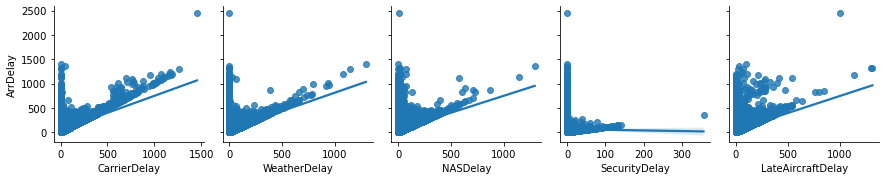

In [581]:
sns.pairplot( df_delay,kind="reg", x_vars=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay'], y_vars="ArrDelay")

In [582]:
# Tras visualizar el DF veo como posibilidad que si ArrDelay es menor que x minutos ( x podría ser de 10 o 20 minutos ), 
# las X_vars tienen valores NaN
# también veo que si se da la condición(min< x), las cinco variables de X_Vars son NaN
df_delay[df_delay["CarrierDelay"].isna()]

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2,4.0,8.0,NaN,NaN,NaN,NaN,NaN
6,3.0,19.0,NaN,NaN,NaN,NaN,NaN
9,12.0,16.0,NaN,NaN,NaN,NaN,NaN
11,6.0,7.0,NaN,NaN,NaN,NaN,NaN
19,14.0,11.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
388300,13.0,7.0,NaN,NaN,NaN,NaN,NaN
388303,5.0,11.0,NaN,NaN,NaN,NaN,NaN
388304,9.0,14.0,NaN,NaN,NaN,NaN,NaN
388307,-6.0,7.0,NaN,NaN,NaN,NaN,NaN


In [583]:
df_delay[df_delay["ArrDelay"]>=20].isna().sum()#miramos varios valores de Arrdelay para ver cuando empiezan a parecer valores NaN

ArrDelay             0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [584]:
df_delay[df_delay["ArrDelay"]>18].isna().sum()

ArrDelay             0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [585]:
df_delay[df_delay["ArrDelay"]>15].isna().sum()


ArrDelay             0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [586]:
df_delay[df_delay["ArrDelay"]>13].isna().sum()

ArrDelay                0
DepDelay                0
CarrierDelay         6755
WeatherDelay         6755
NASDelay             6755
SecurityDelay        6755
LateAircraftDelay    6755
dtype: int64

In [591]:
dfd=df_delay[df_delay["ArrDelay"]>=15]# de manera definitiva
dfd.isna().sum()

ArrDelay             0
DepDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [592]:
dfd=df_delay[df_delay["ArrDelay"]<15]
dfd.isna().sum()

ArrDelay                  0
DepDelay                  0
CarrierDelay         136527
WeatherDelay         136527
NASDelay             136527
SecurityDelay        136527
LateAircraftDelay    136527
dtype: int64

Con esto acabamos de demostrar que los valores de **ArrDelay < 15 minutos**, no registran las causas de retraso.

Podriamos sustituir los valores NaN repartiendo lo minutos de Arrdelay<15 entre las cinco variables, pero hay valores de Arrdelay negativos. **Así que asignaremos un valor de 0.0 a todos lo NaN**



In [593]:
dfd2=df_delay[df_delay["ArrDelay"]>=15]
dfd2.isna().value_counts()


ArrDelay  DepDelay  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay
False     False     False         False         False     False          False                251782
dtype: int64

In [595]:
delay_not_NAN= df_delay[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']].fillna(0.0)
delay_not_NAN.isna().value_counts()

CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay
False         False         False     False          False                388309
dtype: int64

In [596]:
delay_not_NAN.describe()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,388309.000000,388309.000000,388309.000000,388309.000000,388309.000000
mean,12.449173,2.394508,9.805065,0.057823,16.410191
std,35.993053,17.519784,28.360055,1.577782,36.067534
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,0.000000,6.000000,0.000000,18.000000
max,1455.000000,1297.000000,1289.000000,357.000000,1316.000000


In [597]:
df5_0= df4.drop(  ["CarrierDelay", 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay'], axis=1 )# borramos los 
#valores con NaN, y añadimos las variables con la sustitución de NaN por cero
df5= pd.concat([df5_0, delay_not_NAN], axis =1)
df5.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

0.4 **Variables Categóricas y Visualización de variables.** 

 En este apartado vamos a ver de que manera se comportan las viarbles para determinar cuales son independientes o no, así como 
 analizar la categóricas. 
 


In [598]:
df5.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Cómo recordamos en el [ejercicio 9.1](https://github.com/Gerard-Bonet/Sprint9Tasca1.git), habían 300 **origenes y destinos**, así como 20 **compañías**. El retraso acumulado en ArrDelay 

tenía una relación lineal en el número de vuelos por compañías, así que tampoco aportaba mucha más información. 

Mientras que por aeropuerto tenía una tendencia lineal, y crecía algo más para aeropuertos con muchos vuelos 

Así que hacer un get_dummies nos generaría 640 variables, así que **vamos a eliminarlas**. 

In [599]:
df5.drop(["UniqueCarrier", "Origin", "Dest"], axis=1, inplace=True)

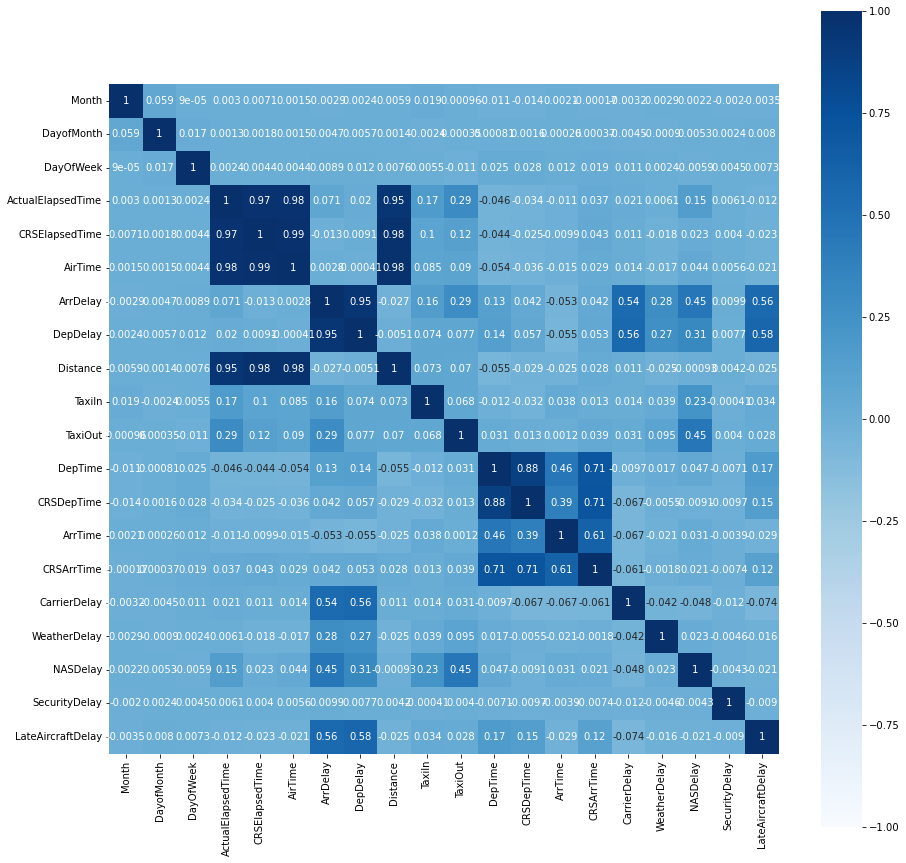

In [600]:
# Vamos a ver la correlación lineal 
df5corr= df5.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df5corr, vmax=1, vmin=-1, square=True,cmap="Blues", annot=True)
plt.show()

#

Nos permite ver que LateAircraft Delay, NasDelay, WheatherDelay y Depdelay son las variables con alta correlación lineal con ArrDelay, y como vimos en el 9.1 ActualElapsedTime', 'CRSElapsedTime', 'AirTime', y Distance  están altamente correlaiconadas
entre ellas pero no con ArrDelay

Las variables temporales (mes, dia del mes y dia de la semana ) tienen una correlación casi nula con el resto de 
variables, además de que en este DataSet funcionan como variables categóricas. 

Empecemos por ver como se distribuye arrdelay en función de los meses, que cómo ya habíamos visto en el ejercicio 9.1 hay más 
vuelos de Diciembre a Marzo y de Junio a Agosto. 

También, si nos fijamos en los días de la semana, vimos en 9.1 que los Jueves, Viernes, Domingos y Lunes tenían más vuelos que los otros días. Siendo el Viernes el día con más vuelos y el sábado el que menos. 

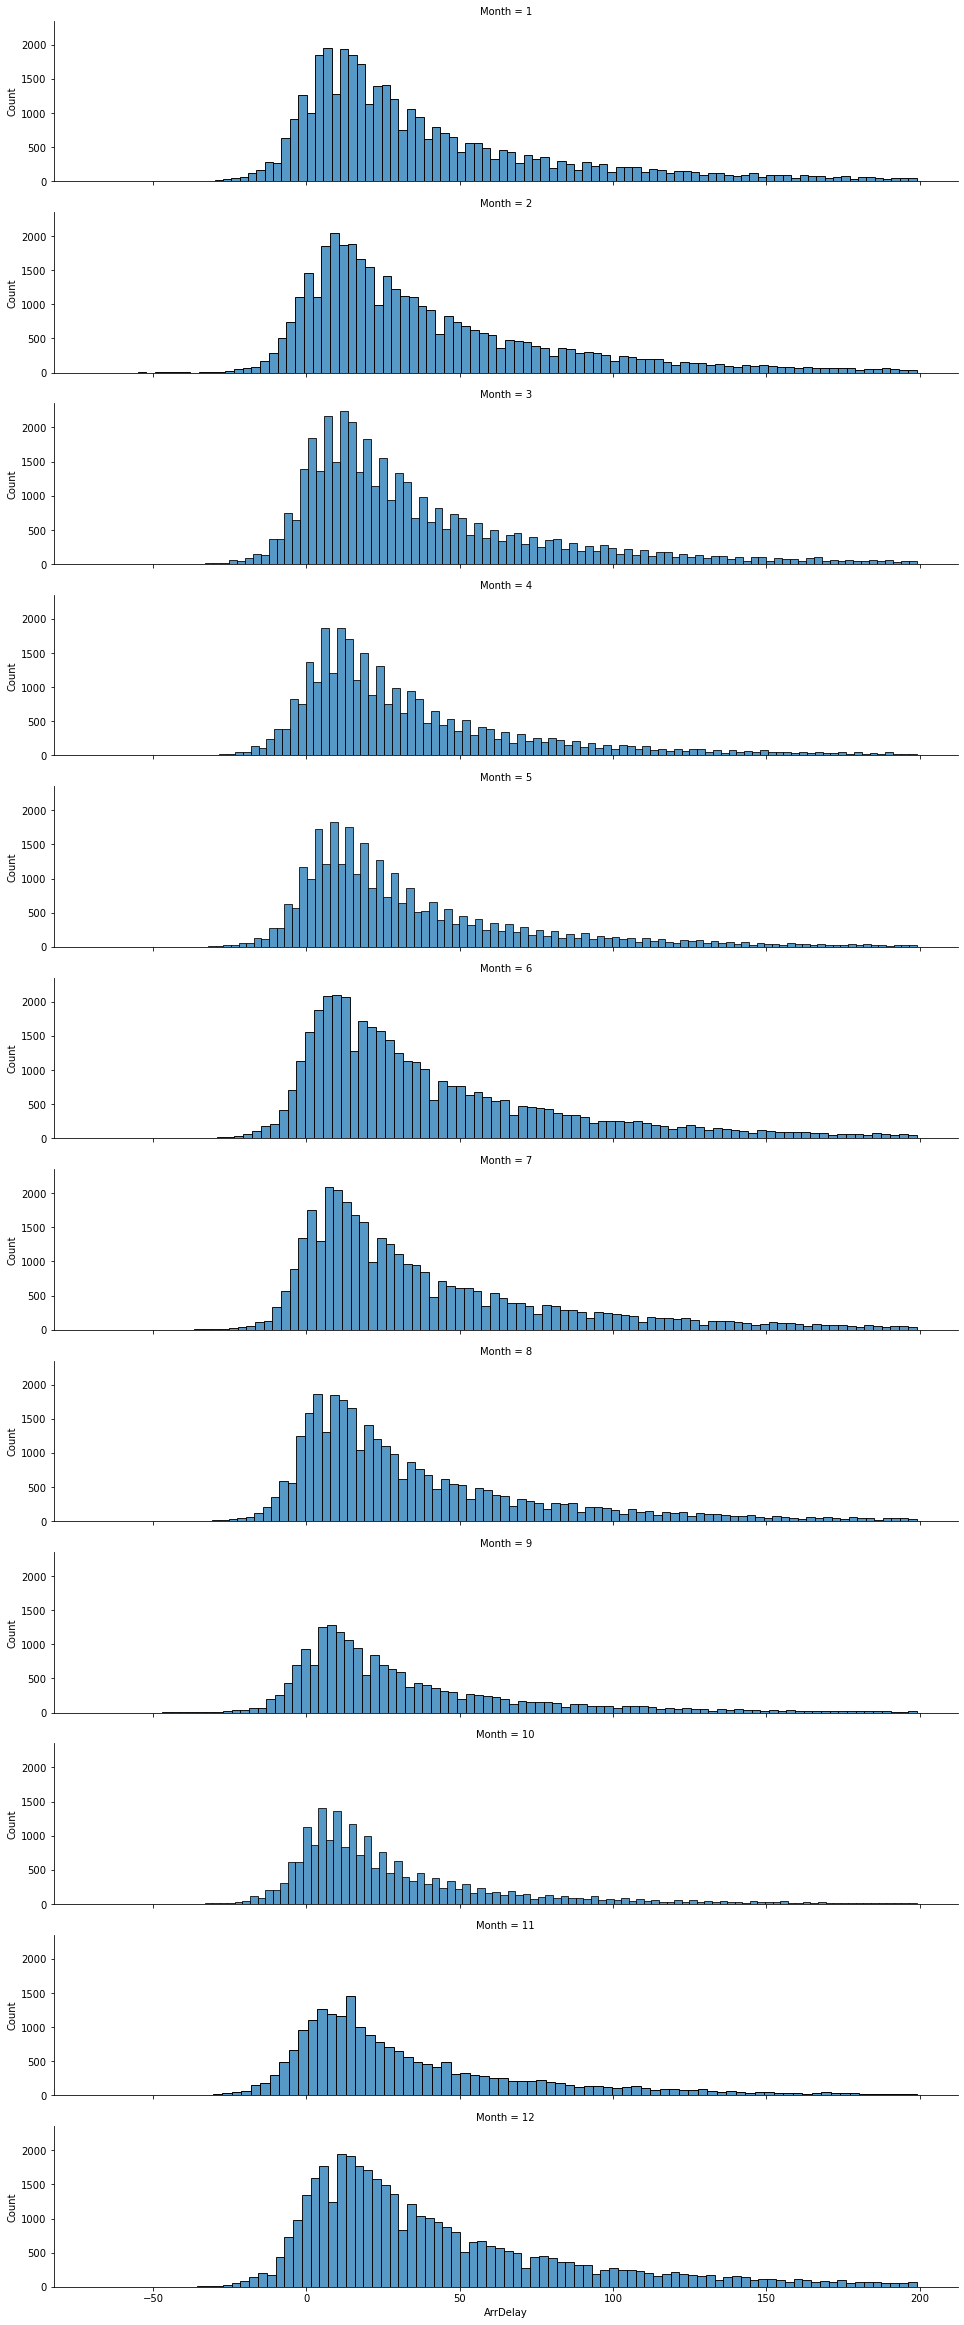

In [601]:
df5ArrMonth= df5[df5["ArrDelay"]<200] # miramos como se distribuye Arrdelay en función del mes
order= []
for i in range(1,13):
    order.append(i)

g = sns.FacetGrid(df5ArrMonth, row="Month", row_order= order,
                  height=2.7, aspect=5,)
g.map( sns.histplot, "ArrDelay", stat="count")


In [602]:
df5[["ArrDelay", "Month"]].groupby("Month").mean()


,ArrDelay
Month,
1,43.028215
2,45.386134
3,42.378138
4,38.908649
5,37.834235
6,46.474412
7,45.884305
8,41.925243
9,36.183144


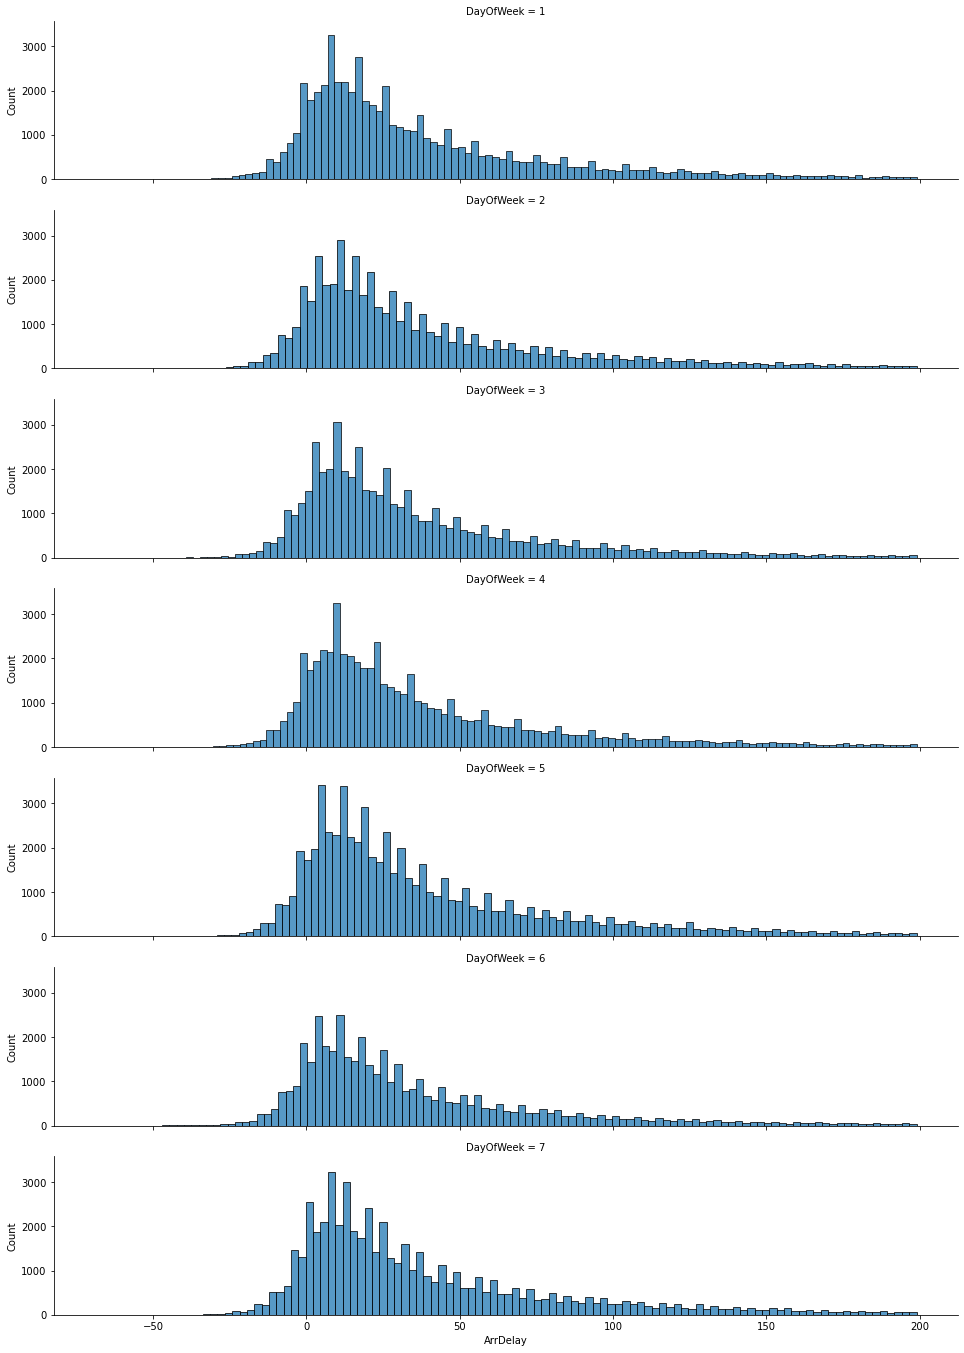

In [603]:
df5ArrMonth= df5[df5["ArrDelay"]<200] # y hacemos lo mismo para el día de la semana 
order2= []
for i in range(1,8):
    order2.append(i)

g = sns.FacetGrid(df5ArrMonth, row="DayOfWeek", row_order= order2,
                  height=2.7, aspect=5,)
g.map( sns.histplot, "ArrDelay", stat="count")

In [604]:
df5[["ArrDelay", "DayOfWeek"]].groupby("DayOfWeek").mean()



,ArrDelay
DayOfWeek,
1,41.603917
2,43.853922
3,40.578513
4,41.155115
5,43.791177
6,40.046067
7,44.903539


<AxesSubplot:xlabel='DayOfWeek'>

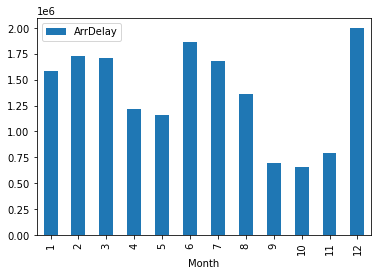

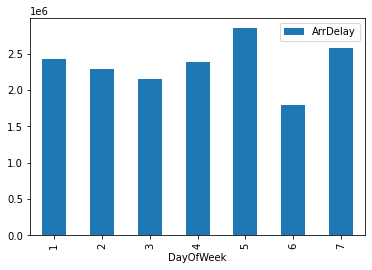

In [605]:
#También mmiramos la distribución del retraso acumulado por meses  y días  

df5[["ArrDelay", "Month"]].groupby("Month").sum().plot(kind="bar") 
df5[["ArrDelay", "DayOfWeek"]].groupby("DayOfWeek").sum().plot(kind="bar")

Las últimas distribuciones tienen una distribución casi idéntica al conteo  de vuelos de Month y Dayofweek que vimos  
en [ejercicio 9.1](https://github.com/Gerard-Bonet/Sprint9Tasca1.git); es decir, a más vuelos, más retraso acumulado. 

Teniendo en cuenta que los vuelos pueden llegar al día siguiente, como los vuelos salidos el Lunes pueden llegar el Martes,
la media de atrasos en función de los días de la semana se mantiene en $ 41.5 \pm 2.5 $. Teniendo en cuenta ésto, y que el día 
de la semana tiene un índice de correlación muy bajo, y que como pasaba con las compañías, hay más atrasado acumulado en función del dia de la semana o del mes a causa de que hay más cantidad de vuelos. Vamos a descartar estas dos variables. 

No voy a hacer el mismo razonamiento para DayofMonth, ya que puedo usar el mismo argumento que con las otras dos variables.

El día del Mes, el mes y el día de la semana , no influye en los retrasos y además nos generaría contabilizar muchas más columnas, ya que son variables categóricas. 


In [606]:
df6= df5.drop(['Month', 'DayofMonth', 'DayOfWeek'], axis=1)


In [608]:
df6.shape# miramos dimensiones del Data Set

(388309, 17)

Las Variables "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", deberían ser una función cíclica, es decir, cuando las horas de 
Arrtime sea menor que DepTime, habría contar 1440 minutos más, dando igual si es CRS o no  

In [508]:
df6[["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]].describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
count,388316.000000,388316.000000,388316.000000,388316.000000
mean,923.004635,891.710421,977.381887,991.636276
std,270.602964,255.424788,329.840536,279.626837
min,1.000000,0.000000,1.000000,1.000000
25%,723.000000,695.000000,795.000000,805.000000
50%,946.000000,910.000000,1035.000000,1025.000000
75%,1141.000000,1098.000000,1231.000000,1214.000000
max,1440.000000,1439.000000,1440.000000,1439.000000


<AxesSubplot:xlabel='CRSArrTime', ylabel='ArrDelay'>

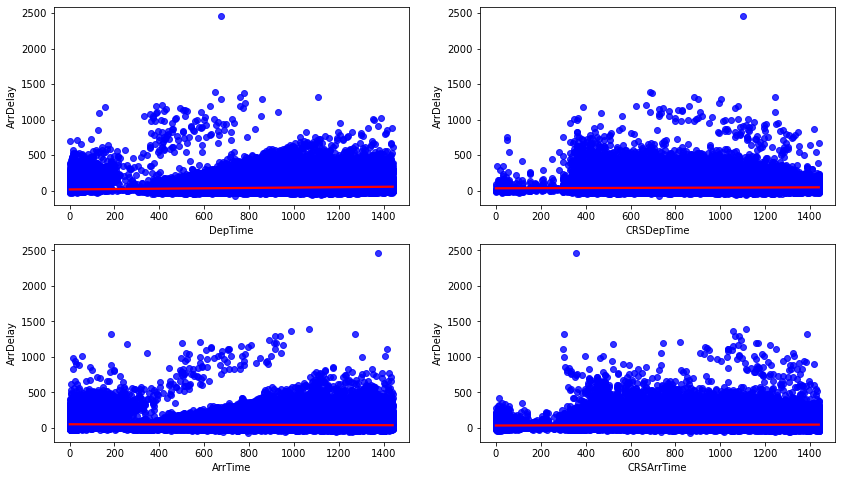

In [609]:
f,axs= plt.subplots(2, 2, figsize=(14,8))
sns.regplot(data=df6, x=  "DepTime",y = "ArrDelay",ax= axs[0,0], ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

sns.regplot( data=df6, x=  "CRSDepTime",y = "ArrDelay",ax= axs[0,1], ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})  

sns.regplot( data=df6, x=  "ArrTime",y = "ArrDelay",ax= axs[1,0]  , ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

sns.regplot( data=df6, x=  "CRSArrTime",y = "ArrDelay",ax= axs[1,1]  , ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})



In [614]:
minimo=df[df["ArrDelay"]<0].sort_values("ArrDelay")# miramos los valores más bajos de ArrDelay
zmin=minimo["ArrDelay"].min()
zmin

-109.0

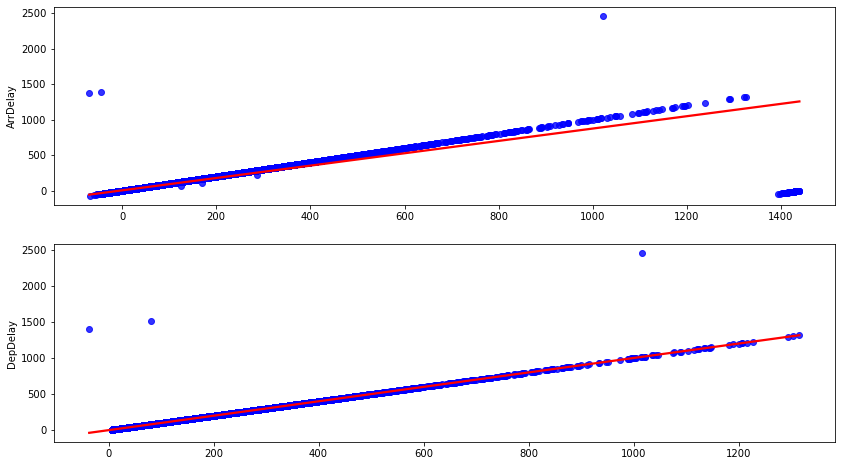

In [615]:
# podemos observar una independencia casi total, pero si hacemos lo siguiente. 
def rest(z):
    x=z[0]
    y=z[1]
    if (x < y) & ((x-y)<zmin): 
        t= (1440+x)-y
        return t
    else:
        t= x-y
        return t  
    
x11= df6[["DepTime","CRSDepTime" ]].apply(rest, axis=1)
x10= df6[["ArrTime","CRSArrTime" ]].apply(rest,axis=1)

f,axs= plt.subplots(2, 1, figsize=(14,8))

sns.regplot(data=df6, x=  x10,y = "ArrDelay",ax= axs[0], ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

sns.regplot( data=df6, x=  x11,y = "DepDelay",ax= axs[1], ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})  

plt.show()


Sean **x10** y **x11** definidas por 

**x10= df6["ArrTime"]-df6["CRSArrTime"]**

**x11= df6["DepTime"]-df6["CRSDepTime"]**

podemos observar una relación lineal.



Por otro lado, habíamos visto en el ejercicio 9.1 lo siguiente:

"ActualElapsedTime", "CRSElapsedTime","AirTime" y "Distance" tienen un coeficiente de correlación lineal entre ellas cercano a 0,95  ±2  , mientras que ArrDelay y DepDelay, tienen una correlación cercana a cero respecto a estas 4 variables.

Arrdelay y DepDelay tienen una correlación cercana a 0,8.

Por lo que sólo nos queda estudiar Taxiin y taxiout

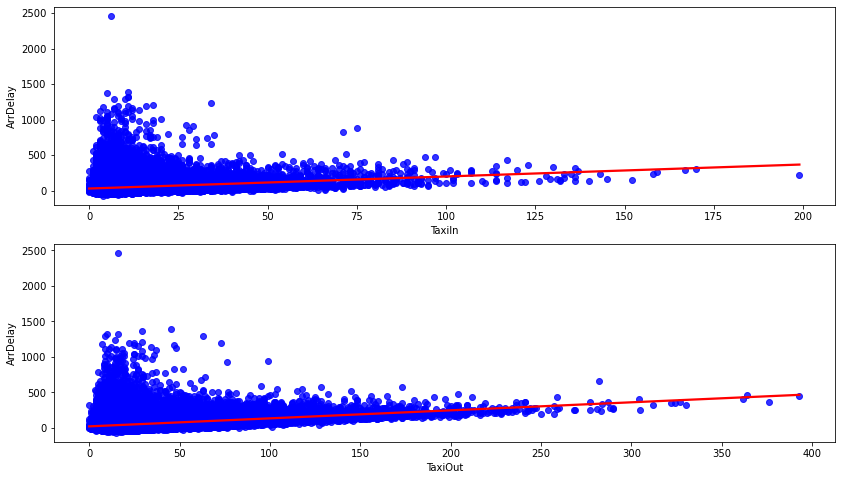

In [616]:
f,axs= plt.subplots(2, 1, figsize=(14,8))

sns.regplot(data=df6, x=  "TaxiIn",y = "ArrDelay",ax= axs[0], ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

sns.regplot( data=df6, x=  "TaxiOut",y = "ArrDelay",ax= axs[1], ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})  

plt.show()

Podemos ver que ambas variables (TaxiIn y TaxiOut)tienen una correlación muy baja respecto a ArrDelay, a pesar de la tendencia 
lineal. Pero hay una gran acumulación de restrasos importantes a pesar de tiempos cortos de tiempos de despegue (TaxiOut) o de 
aterrizaje, lo que hace perder la linealidad para valores bajos de taxiin o taxiouit



0.5 **Transformación y Selección de Variable** 

Vamos a usar el coeficiente de correlación para seleccionar las características que mejor nos sirven para la regressión. 

Antes de todo, vamos a remodelar el data set, añadiendo x10 y x11, y eliminado 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', ya que x10 y x11 son combinaciones lienales de estas 4. 

También eliminamos 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime' ya que tienen un 0.95 de correlación o más  con Distance y aportan la misma información. 



In [617]:
x10=x10.rename("X10")
x11=x11.rename("X11")
x10.describe()

count    388309.000000
mean         42.711938
std          60.690127
min         -70.000000
25%           9.000000
50%          25.000000
75%          56.000000
max        1439.000000
Name: X10, dtype: float64

In [618]:
x11.describe()

count    388309.000000
mean         43.211113
std          53.184278
min         -37.000000
25%          12.000000
50%          24.000000
75%          53.000000
max        1316.000000
Name: X11, dtype: float64

In [619]:
x1= pd.concat([x10,x11,df6["ArrDelay"]],axis=1)
x1.corr()

,X10,X11,ArrDelay
X10,1.000000,0.886520,0.927101
X11,0.886520,1.000000,0.949764
ArrDelay,0.927101,0.949764,1.000000


In [620]:
#remodelamos el DF con x10 y x11
df6b=df6.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime'], axis=1)
df7=pd.concat([df6b, x10,x11], axis =1)
df7

,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,X10,X11
0,20.0,24.0,296,2.0,8.0,5.0,0.0,0.0,0.0,15.0,20,24
1,64.0,34.0,260,3.0,42.0,0.0,0.0,30.0,0.0,34.0,64,34
2,4.0,8.0,248,3.0,9.0,0.0,0.0,0.0,0.0,0.0,4,8
3,35.0,12.0,328,7.0,29.0,0.0,0.0,23.0,0.0,12.0,35,12
4,33.0,32.0,2611,10.0,45.0,0.0,0.0,19.0,0.0,14.0,33,32
...,...,...,...,...,...,...,...,...,...,...,...,...
388304,9.0,14.0,967,6.0,11.0,0.0,0.0,0.0,0.0,0.0,9,14
388305,140.0,68.0,2381,8.0,106.0,4.0,0.0,136.0,0.0,0.0,140,68
388306,47.0,49.0,1121,13.0,10.0,4.0,0.0,0.0,0.0,43.0,47,49
388307,-6.0,7.0,906,7.0,9.0,0.0,0.0,0.0,0.0,0.0,-6,7


-Hasta el momento hemos reducido una docena de variables categóricas, bien porque no aportaban nada como Year, bien porque 
nos aumentaban la dimensionalidad del DataSet  como Origen o bien porque no influenciaban en nada  como 
el mes en que se daba el vuelo sobre el ArrDelay.

-Hemos reducido 4 variables continuas a x10 y x11

-Y hemos reducido 4 variables a 1, debido a su alto grado de correlación entre ellas( dejando Distance)

Con las que quedan, vamos a ver el coeficente de correlación de Spearman, pero antes de todo,vamos a estandarizar las variables 



In [622]:
scaler = StandardScaler()

df8= pd.DataFrame(scaler.fit_transform(df7), columns=df7.columns )

df8.describe().round(3)

,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,X10,X11
count,388309.000,388309.000,388309.000,388309.000,388309.000,388309.000,388309.000,388309.000,388309.000,388309.000,388309.000,388309.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.956,-0.697,-1.280,-1.299,-1.262,-0.346,-0.137,-0.346,-0.037,-0.455,-1.857,-1.508
25%,-0.586,-0.585,-0.743,-0.536,-0.570,-0.346,-0.137,-0.346,-0.037,-0.455,-0.555,-0.587
50%,-0.305,-0.360,-0.276,-0.155,-0.293,-0.346,-0.137,-0.346,-0.037,-0.455,-0.292,-0.361
75%,0.239,0.183,0.405,0.227,0.191,-0.068,-0.137,-0.134,-0.037,0.044,0.219,0.184
max,42.474,45.202,7.316,36.653,25.930,40.079,73.894,45.106,226.231,36.032,23.007,23.932


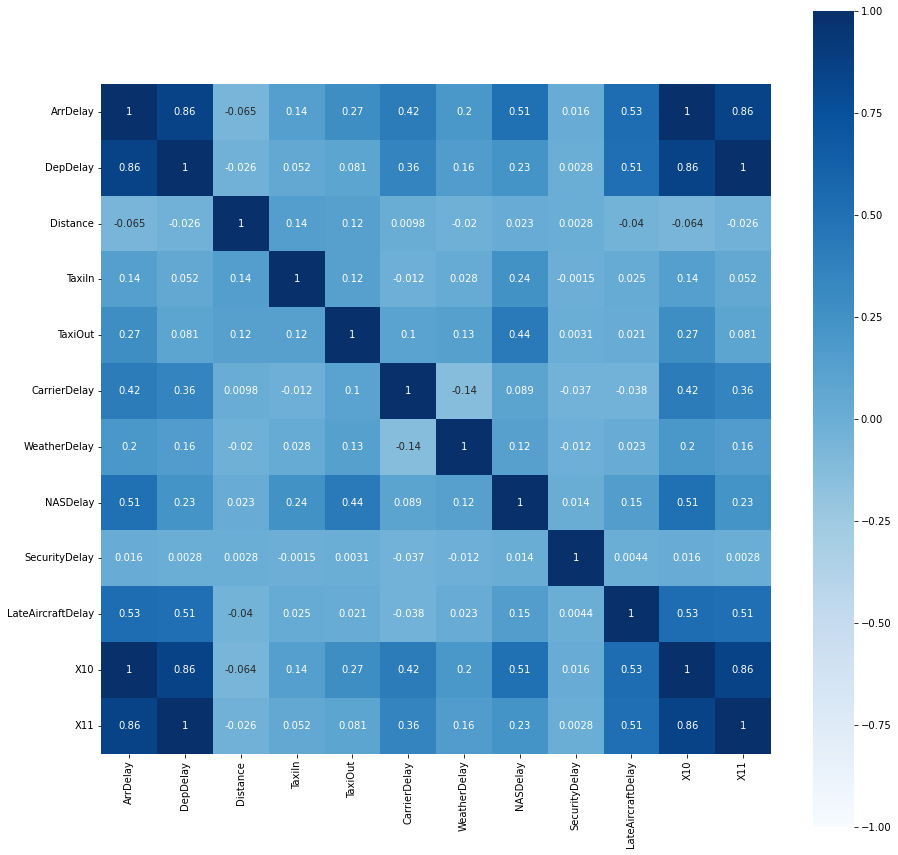

In [623]:
# y aplicamos el coeficiente de correlación de Spearman
df8corr= df8.corr(method="spearman")
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df8corr, vmax=1, vmin=-1, square=True,cmap="Blues", annot=True)
plt.show()

EL coeficiente de correlación de Sperman tampoco no aporta mucho más que el de Pearson. Vamos a mirar un método de selección 
de variables, para ver cuales son las mejores variables. Escogeremos f_regression.

In [624]:
df8.columns

Index(['ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'X10',
       'X11'],
      dtype='object')

In [626]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
Xpreseleccion= df8.drop(["ArrDelay"], axis=1)
ypreseleccion= df8["ArrDelay"]
for i in range(1,12): # vamos a mirar como f_selection va escogiendo las variables en función del estadístico F
    fs = SelectKBest(score_func=f_regression, k=i)
    XS=fs.fit(Xpreseleccion,ypreseleccion)
    

    filter=fs.get_support()
    variables=np.array(Xpreseleccion.columns)
    print(variables[filter])
    print (XS.scores_[filter])
    print ("\n")





['DepDelay']
[3769265.55583226]


['DepDelay' 'X11']
[3769265.55583226 3576130.23084345]


['DepDelay' 'X10' 'X11']
[3769265.55583226 2375760.80696682 3576130.23084345]


['DepDelay' 'LateAircraftDelay' 'X10' 'X11']
[3769265.55583226  177930.52236788 2375760.80696682 3576130.23084345]


['DepDelay' 'CarrierDelay' 'LateAircraftDelay' 'X10' 'X11']
[3769265.55583226  160079.61296462  177930.52236788 2375760.80696682
 3576130.23084345]


['DepDelay' 'CarrierDelay' 'NASDelay' 'LateAircraftDelay' 'X10' 'X11']
[3769265.55583226  160079.61296462  100283.5404789   177930.52236788
 2375760.80696682 3576130.23084345]


['DepDelay' 'TaxiOut' 'CarrierDelay' 'NASDelay' 'LateAircraftDelay' 'X10'
 'X11']
[3769265.55583226   34745.56752364  160079.61296462  100283.5404789
  177930.52236788 2375760.80696682 3576130.23084345]


['DepDelay' 'TaxiOut' 'CarrierDelay' 'WeatherDelay' 'NASDelay'
 'LateAircraftDelay' 'X10' 'X11']
[3769265.55583226   34745.56752364  160079.61296462   32833.43766192
  100283.5404

Observamos que la selección de variables por f_Regression nos lleva a unos resultados muy similares al coeficiente correlación 
Pearson. Así que escogeremos la variables con mayor inidce que correlación:
    
 sean las variables,    ['DepDelay' 'TaxiOut' 'CarrierDelay' 'NASDelay' 'LateAircraftDelay']
    

In [627]:
df9= df8[["ArrDelay",'DepDelay', 'CarrierDelay', 'NASDelay' ,'LateAircraftDelay', 'X10', 'X11']]
df9.head()

,ArrDelay,DepDelay,CarrierDelay,NASDelay,LateAircraftDelay,X10,X11
0,-0.392916,-0.359972,-0.206962,-0.345735,-0.039099,-0.374228,-0.361218
1,0.379780,-0.172703,-0.345878,0.712092,0.487692,0.350767,-0.173193
2,-0.673896,-0.659601,-0.345878,-0.345735,-0.454986,-0.637863,-0.662060
3,-0.129497,-0.584693,-0.345878,0.465265,-0.122276,-0.127071,-0.586849
4,-0.164619,-0.210157,-0.345878,0.324222,-0.066824,-0.160025,-0.210798


0.6 **Separación entre Train y Test**. 

In [669]:
X_= df9.drop(["ArrDelay"], axis=1)

y_= df9["ArrDelay"]

X_train, X_test, y_train, y_test = train_test_split( X_, y_, test_size=0.30, random_state=42, shuffle=True)


1.  **Modelos de regresión**

Crea tres modelos de regresión para predecir ArrDelay 

In [670]:
#Creamos los 3 modelos
lin = LinearRegression()
rft=RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42 )
mpl= MLPRegressor(hidden_layer_sizes=(20,20,20), activation="logistic", solver="sgd",max_iter=300 )

- **Modelo de regresión lineal**

In [671]:

lin.fit(X_train, y_train)
fx_lin= lin.predict(X_test)# la f(x0,....,xn)predicha

print(fx_lin)# valores de fx predichos
print(fx_lin.shape) #tamaño de la matriz

[-0.59192627 -0.04903688  1.98516398 ... -0.50185393  3.57299985
 -0.30672891]
(116493,)


In [672]:
r_lin = lin.score(X_test, y_test)
r_lin # podemos ver que el ajuste de correlación es de valor alto

0.964644479218502

In [673]:
# sea y = A1X1+A2X2+......+AnXn + b
print('punto de corte del eje y(x=0) ', lin.intercept_) # marca el punto de intercepeción del eje y cuando x=0, b
print( "coeficientes de las variables x", lin.coef_)# marca los coeficientes A1,...:AN de las variables indeondientes 

punto de corte del eje y(x=0)  -0.00018945577678235374
coeficientes de las variables x [ 0.55591402  0.19876481  0.23056239  0.19885476  0.22648193 -0.10485442]


- **Modelo de bosque aleatorio** 

In [674]:
rft.fit(X_train, y_train)
fx_rft= rft.predict(X_test)# la f(x0,....,xn)predicha
print(fx_rft)# valores de fx predichos


[-0.53340595 -0.07681316  1.99541568 ... -0.58608974  5.60635104
 -0.35779334]


In [675]:
# miramos la correlación lienal
r_rft = rft.score(X_test, y_test)
r_rft

0.9965161795634709

In [676]:
# como no calcula coeficientes, ya que los cálculos los hace en función de la ganancia de información de cada arbol del conjunto
# aleatorio, miramos la importancia de cada caracterísitca. 
importance = rft.feature_importances_
variables_finales=['DepDelay', 'CarrierDelay', 'NASDelay' ,'LateAircraftDelay', 'X10', 'X11']
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j), variables_finales[i])

Feature: 0, Score: 0.03296 DepDelay
Feature: 1, Score: 0.00138 CarrierDelay
Feature: 2, Score: 0.00007 NASDelay
Feature: 3, Score: 0.00023 LateAircraftDelay
Feature: 4, Score: 0.93384 X10
Feature: 5, Score: 0.03153 X11


- **Modelo de red neuronal perceptron multicapa**

In [677]:
mpl.fit(X_train, y_train)
fx_mpl= mpl.predict(X_test)# la f(x0,....,xn)predicha

print(fx_mpl)# valores de fx predichos


[-0.5509554  -0.07656328  1.95627453 ... -0.59199328  4.35712496
 -0.36216793]


In [678]:
# comprobamos el coeficiente de la regresión
r_mpl= mpl.score(X_test, y_test)
r_mpl

0.9928160022463813

2. **Comprueba el error en la métrica de MSE y R2**


Podemos observar, que los coeficientes de correlación tienen muy buenos ajustes. 



In [679]:
print( "correlación lineal para la regresión lineal ", r_lin)


correlación lineal para la regresión lineal  0.964644479218502


In [680]:
print( "correlación lineal para el bosque aleatorio ", r_rft)


correlación lineal para el bosque aleatorio  0.9965161795634709


In [681]:
print( "correlación lineal para el perceptrón multicapa ", r_mpl)

correlación lineal para el perceptrón multicapa  0.9928160022463813


Ahora miramos el error cuadrático medio

In [703]:
print('Error cuadrático medio de la regresión lineal :', mean_squared_error(y_test, fx_lin)) 


Error cuadrático medio de la regresión lineal : 0.035512607671719564


In [704]:
print('Error cuadrático medio del bosque aleatorio:', mean_squared_error(y_test, fx_rft)) 


Error cuadrático medio del bosque aleatorio: 0.003499299278485463


In [705]:
print('Error cuadrático medio de la red enurona:', mean_squared_error(y_test, fx_mpl))

Error cuadrático medio de la red enurona: 0.007215916725296389


Contando que las variables están estandarizadas, y la media tiende a cero, y el error cuadrático medio reduce las 
discrepancias menores a uno, el que mejor rendimiento saca es el Bosque Aleatorio

- **Ejercicio 3** :Modificar el modelo para ver el resultado. 

Vamos a modificar ciertos parámetros del modelo para ver cómo responden

------------------------------------------------------------------------------------

.  **Regresión lineal** 

Modificamos el témino constante 

In [686]:
#Empecemos modificando, quitando el término constante de la ecuación
lin2 = LinearRegression(fit_intercept= False  )

In [687]:
lin2.fit(X_train, y_train)
fx_lin2= lin2.predict(X_test)


In [701]:
r_lin2 = lin2.score(X_test, y_test)
print("coeficiente sin término constante", r_lin2)
print("coeficiente con término constante ", r_lin) 
print("diferencia de ajuste  = ", (r_lin-r_lin2))
if r_lin< r_lin2: 
    print ( "la regresión sin término constante tiene mejor ajuste ")
else: 
    print ( "la regresión con término constante tiene mejor ajuste ")
    

coeficiente sin término constante 0.9646446789354357
coeficiente con término constante  0.964644479218502
diferencia de ajuste  =  -1.9971693365761212e-07
la regresión sin término constante tiene mejor ajuste 


In [707]:
print( "coeficientes de las variables x sin término constante ", lin2.coef_)
print( "coeficientes de las variables x con término constante ", lin.coef_)


coeficientes de las variables x sin término constante  [ 0.55591417  0.19876508  0.23056243  0.19885478  0.22648168 -0.10485452]
coeficientes de las variables x con término constante  [ 0.55591402  0.19876481  0.23056239  0.19885476  0.22648193 -0.10485442]


In [759]:
print('Error cuadrático medio de la regresión lineal sin término constante:', mean_squared_error(y_test, fx_lin2))
print('Error cuadrático medio de la regresión lineal con término constante:', mean_squared_error(y_test, fx_lin))
if  mean_squared_error(y_test, fx_lin)<  mean_squared_error(y_test, fx_lin2): 
    print ( "la regresión con término constante tiene menor error de ajuste ")
else: 
    print ( "la regresión sin término constante tiene menor error de ajuste ")
    

Error cuadrático medio de la regresión lineal sin término constante: 0.03551240706743044
Error cuadrático medio de la regresión lineal con término constante: 0.035512607671719564
la regresión sin término constante tiene menor error de ajuste 


Tenemos unas discrepancias mínimas, podemos ver que el ajuste sin término constante tiene mejor ajuste con el coeficiente de 
correlación, sin embargo su error es menor en el término constante 

. **Bosque Aleatorio.** 

Empecemos modificando el número de árboles a la mitad

In [714]:
rft2=RandomForestRegressor( n_estimators=100, max_depth=10, random_state=42 )

In [715]:
rft2.fit(X_train, y_train)
fx_rft2= rft2.predict(X_test)

In [722]:
r_rft2 = rft2.score(X_test, y_test)
print("r del bosque  con 100 árboles  ", r_rft2)
print("r del bosque  con 200 árboles  ", r_rft) 

r del bosque  con 100 árboles   0.996598028759104
r del bosque  con 200 árboles   0.9965161795634709


In [723]:
if r_rft< r_rft2: 
    print ( "bosque  con 100 árboles, tiene mejor ajuste")
else: 
    print ( "bosque  con 200 árboles , tiene mejor ajuste ")

bosque  con 100 árboles, tiene mejor ajuste


In [760]:
print('Error cuadrático medio de la regresión lineal con 100 árboles:', mean_squared_error(y_test, fx_rft2))
print('Error cuadrático medio de la regresión lineal con 200 árboles:', mean_squared_error(y_test, fx_rft))
if  mean_squared_error(y_test, fx_rft)<  mean_squared_error(y_test, fx_rft2): 
    print ( "la regresión con 200 árboles tiene menor error de ajuste ")
else: 
    print ( "la regresión con 100 árboles tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal con 100 árboles: 0.0034170864215253114
Error cuadrático medio de la regresión lineal con 200 árboles: 0.003499299278485463
la regresión con 100 árboles tiene menor error de ajuste 


modificamos el máximo de la profundidad de las capas a la mitad

In [719]:
rft3=RandomForestRegressor( n_estimators=200, max_depth=5, random_state=42 )

In [720]:
rft3.fit(X_train, y_train)
fx_rft3= rft3.predict(X_test)

In [725]:
r_rft3 = rft3.score(X_test, y_test)
print("r del bosque  con 5 capas   ", r_rft3)
print("r del bosque  con 10 capas   ", r_rft) 

r del bosque  con 5 capas    0.9901808887316629
r del bosque  con 10 capas    0.9965161795634709


In [726]:
if r_rft< r_rft3: 
    print ( "bosque  con 5 capas, tiene mejor ajuste")
else: 
    print ( "bosque con 10 capas , tiene mejor ajuste ")

bosque con 10 capas , tiene mejor ajuste 


In [761]:
print('Error cuadrático medio de la regresión lineal con 5 capas:', mean_squared_error(y_test, fx_rft3))
print('Error cuadrático medio de la regresión lineal con 10 capas:', mean_squared_error(y_test, fx_rft))
if  mean_squared_error(y_test, fx_rft)<  mean_squared_error(y_test, fx_rft3): 
    print ( "la regresión con 10 capas tiene menor error de ajuste ")
else: 
    print ( "la regresión con  5 capas tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal con 5 capas: 0.009862738221632897
Error cuadrático medio de la regresión lineal con 10 capas: 0.003499299278485463
la regresión con 10 capas tiene menor error de ajuste 


- **Red Neuronal**

Vamos a modificar el número de capas, la tasa de aprendizaje, la función de activación, el método de cálculo del gradiente, 

In [728]:
mpl1= MLPRegressor(hidden_layer_sizes=(20,20), activation="logistic", solver="sgd",max_iter=300 )# número de capas
mpl2= MLPRegressor(hidden_layer_sizes=(20,20,20), activation="relu", solver="sgd",max_iter=300 )# la función de activación
mpl3= MLPRegressor(hidden_layer_sizes=(20,20,20), activation="logistic", solver="sgd",max_iter=300, learning_rate_init=0.01, 
                  learning_rate= "invscaling")# modificando la tasa de aprendizaje  
mpl4= MLPRegressor(hidden_layer_sizes=(20,20,20), activation="logistic", solver="adam",max_iter=300 )# solventamos por Adam

En MPL1 hemos quitado una capa 

In [729]:
mpl1.fit(X_train, y_train)#Entrenamos los modelos

MLPRegressor(activation='logistic', hidden_layer_sizes=(20, 20), max_iter=300,
             solver='sgd')

En MPL2 hemos cambiado la función de activación tipo RELU, tal que si x<0 Relu=0 , si x>=0, Relu=x

In [730]:
mpl2.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(20, 20, 20), max_iter=300, solver='sgd')

En MPL 3 hemos modificado hemos modificado la tasa de aprendizaje de 0.001 a 0.01, y en vez de ser constante será decreciente. 

In [731]:
mpl3.fit(X_train, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(20, 20, 20),
             learning_rate='invscaling', learning_rate_init=0.01, max_iter=300,
             solver='sgd')

En mpl4 hemos cambiado la manera de solventart el cálculo de pesos, pasando de una solución por gradiente a una por gradiente 
en que la tasa de aprendizaje es adaptativa(ADAM)

In [732]:
mpl4.fit(X_train, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(20, 20, 20),
             max_iter=300)

**Red con dos capas en vez de tres**

In [736]:
# Analizamos la red con una capa menos 
fx_mpl1= mpl1.predict(X_test)

In [737]:
r_mpl1 = mpl1.score(X_test, y_test)
print("r de red con dos capas  ", r_mpl1)
print("r de red  con 3 capas   ", r_mpl)
if r_mpl< r_mpl1: 
     print ( "red con dos capas ocultas tiene mejor ajuste")
else: 
    print ( "red con tres capas ocultas tiene mejor ajuste")
 

r de red con dos capas   0.9916448739439979
r de red  con 3 capas    0.9928160022463813
red con tres capas ocultas tiene mejor ajuste


In [762]:
print('Error cuadrático medio de la regresión lineal con 2 capas:', mean_squared_error(y_test, fx_mpl1))
print('Error cuadrático medio de la regresión lineal con 3 capas:', mean_squared_error(y_test, fx_mpl))
if  mean_squared_error(y_test, fx_mpl)<  mean_squared_error(y_test, fx_mpl1): 
    print ( "la regresión con 3 capas tiene menor error de ajuste ")
else: 
    print ( "la regresión con  2 capas tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal con 2 capas: 0.008392248427290557
Error cuadrático medio de la regresión lineal con 3 capas: 0.007215916725296389
la regresión con 3 capas tiene menor error de ajuste 


Podemos ver que la red de 3 capas  tiene un mejor ajuste y menor error

---------------------------------------------

- **Red con función de activación RELU**

In [739]:
fx_mpl2= mpl2.predict(X_test)

In [741]:
r_mpl2 = mpl2.score(X_test, y_test)
print("r de red con función de activación RELU  ", r_mpl2)
print("r de red  con función de activación logística  ", r_mpl)
if r_mpl< r_mpl2: 
     print ( "red con función de activación RELU tiene mejor ajuste")
else: 
    print ( "red con función de activación logística tiene mejor ajuste")
 

r de red con función de activación RELU   0.9963226937540764
r de red  con función de activación logística   0.9928160022463813
red con función de activación RELU tiene mejor ajuste


In [763]:
print('Error cuadrático medio de la regresión lineal con función de activación Relu:', mean_squared_error(y_test, fx_mpl2))
print('Error cuadrático medio de la regresión lineal con función de activación logísitca:', mean_squared_error(y_test, fx_mpl))
if  mean_squared_error(y_test, fx_mpl)<  mean_squared_error(y_test, fx_mpl2): 
    print ( "la regresión con función de activación logísitca tiene menor error de ajuste ")
else: 
    print ( "la regresión con  función de activación Relu: tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal con función de activación Relu: 0.0036936447579804348
Error cuadrático medio de la regresión lineal con función de activación logísitca: 0.007215916725296389
la regresión con  función de activación Relu: tiene menor error de ajuste 


- **red con tasa de aprendizaje descendiente** 

In [743]:
fx_mpl3= mpl3.predict(X_test)

In [749]:
r_mpl3 = mpl3.score(X_test, y_test)
print("r de red con tasa de aprendizaje descendiente  ", r_mpl3)
print("r de red  con tasa de aprendizaje constante  ", r_mpl)
if r_mpl< r_mpl3: 
     print ( "red con tasa de aprendizaje descendiente tiene mejor ajuste")
else: 
    print ( "red con tasa de aprendizaje constante tiene mejor ajuste")
 

r de red con tasa de aprendizaje descendiente   0.8878419394687965
r de red  con tasa de aprendizaje constante   0.9928160022463813
red con tasa de aprendizaje constante tiene mejor ajuste


In [764]:
print('Error cuadrático medio de la regresión lineal con tasa de aprendizaje descendiente:', mean_squared_error(y_test, fx_mpl3))
print('Error cuadrático medio de la regresión lineal con tasa de aprendizaje constante :', mean_squared_error(y_test, fx_mpl))
if  mean_squared_error(y_test, fx_mpl)<  mean_squared_error(y_test, fx_mpl3): 
    print ( "la regresión con tasa de aprendizaje constante tiene menor error de ajuste ")
else: 
    print ( "la regresión con  tasa de aprendizaje descendiente tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal con tasa de aprendizaje descendiente: 0.11265638612654726
Error cuadrático medio de la regresión lineal con tasa de aprendizaje constante : 0.007215916725296389
la regresión con tasa de aprendizaje constante tiene menor error de ajuste 


Con estos dos cambios, pasar de la tasa de aprendizaje a 0.01 y hacerla descendiente, hemos perdido calidad en el ajuste y en el 
error

- **Red que calcula los pesos con el método de adam**

In [748]:
fx_mpl4= mpl4.predict(X_test)

In [752]:
r_mpl4 = mpl4.score(X_test, y_test)
print("r de red con método de ADAM  ", r_mpl4)
print("r de red  con método de SGD  ", r_mpl)
if r_mpl< r_mpl4: 
     print ( "red con método de ADAM tiene mejor ajuste")
else: 
    print ( "red con método de SGD tiene mejor ajuste")
 

r de red con método de ADAM   0.9996679225921206
r de red  con método de SGD   0.9928160022463813
red con método de ADAM tiene mejor ajuste


In [765]:
print('Error cuadrático medio de la regresión lineal con método de ADAM:', mean_squared_error(y_test, fx_mpl4))
print('Error cuadrático medio de la regresión lineal con método de SGD :', mean_squared_error(y_test, fx_mpl))
if  mean_squared_error(y_test, fx_mpl)<  mean_squared_error(y_test, fx_mpl4): 
    print ( "la regresión  con método de SGD tiene menor error de ajuste ")
else: 
    print ( "la regresión con método de ADAM tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal con método de ADAM: 0.00033355284951244615
Error cuadrático medio de la regresión lineal con método de SGD : 0.007215916725296389
la regresión con método de ADAM tiene menor error de ajuste 


------------------------------------------------------------------------

- **Ejercicio 4.**  Validación Interna. 

Vamos a ha hacer las mismas pruebas pero sin hacer entrenamiento 

In [753]:
linvi = LinearRegression()
rftvi=RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42 )
mplvi= MLPRegressor(hidden_layer_sizes=(20,20,20), activation="logistic", solver="sgd",max_iter=300 )

- **Regresión lineal** 

In [754]:
linvi.fit(X_, y_)
fx_linvi= linvi.predict(X_)


In [816]:
r_linvi = linvi.score(X_, y_)
print("r de regresión lineal sin entrenamiento  ", r_linvi)
print("r de regresión lineal con entrenamiento ", r_lin)
if r_lin< r_linvi: 
     print ( "regresion sin entrenamiento tiene  mejor ajuste")
else: 
    print ( "regresion con entrenamiento tiene mejor ajuste")

r de regresión lineal sin entrenamiento   0.9637383551427225
r de regresión lineal con entrenamiento  0.964644479218502
regresion con entrenamiento tiene mejor ajuste


In [766]:
print('Error cuadrático medio de la regresión lineal sin entrenamiento :', mean_squared_error(y_, fx_linvi))
print('Error cuadrático medio de la regresión lineal con entrenamiento :', mean_squared_error(y_test, fx_lin))
if  mean_squared_error(y_test, fx_lin)<  mean_squared_error(y_, fx_linvi): 
    print ( "la regresión  con entrenamiento tiene menor error de ajuste ")
else: 
    print ( "la regresión sin entrenar tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal sin entrenamiento : 0.036261644857277515
Error cuadrático medio de la regresión lineal con entrenamiento : 0.035512607671719564
la regresión  con entrenamiento tiene menor error de ajuste 


- **Bosque aleatorio** 

In [768]:
rftvi.fit(X_, y_)
fx_rftvi= rftvi.predict(X_)

In [817]:
r_rftvi = rftvi.score(X_, y_)
print("r de regresión lineal sin entrenamiento  ", r_rftvi)
print("r de regresión lineal con entrenamiento ", r_rft)
if r_rft< r_rftvi: 
     print ( "bosque aleatorio sin entrenamiento tiene mejor ajuste")
else: 
    print ( "bosque aleatorio con entrenamiento tiene mejor ajuste")

r de regresión lineal sin entrenamiento   0.9994310747460813
r de regresión lineal con entrenamiento  0.9965161795634709
bosque aleatorio sin entrenamiento tiene mejor ajuste


In [773]:
print('Error cuadrático medio de la regresión lineal sin entrenamiento :', mean_squared_error(y_, fx_rftvi))
print('Error cuadrático medio de la regresión lineal con entrenamiento :', mean_squared_error(y_test, fx_rft))
if  mean_squared_error(y_test, fx_rft)<  mean_squared_error(y_, fx_rftvi): 
    print ( "la regresión  con entrenamiento tiene menor error de ajuste ")
else: 
    print ( "la regresión sin entrenar tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal sin entrenamiento : 0.0005689252539186685
Error cuadrático medio de la regresión lineal con entrenamiento : 0.003499299278485463
la regresión sin entrenar tiene menor error de ajuste 


- **Red Neuronal** 

In [774]:
mplvi.fit(X_, y_)
fx_mplvi= mplvi.predict(X_)

In [783]:
r_mplvi = mplvi.score(X_, y_)
print("r de regresión lineal sin entrenamiento  ", r_mplvi)
print("r  de regresión lineal con entrenamiento ", r_mpl)
if r_mpl< r_mplvi: 
     print ( "red sin entrenamiento tiene mejor ajuste")
else: 
    print ( "red con entrenamiento tiene mejor ajuste")

r de regresión lineal sin entrenamiento   0.9928539941243647
r  de regresión lineal con entrenamiento  0.9928160022463813
red sin entrenamiento tiene mejor ajuste


In [776]:
print('Error cuadrático medio de la regresión lineal sin entrenamiento :', mean_squared_error(y_, fx_mplvi))
print('Error cuadrático medio de la regresión lineal con entrenamiento :', mean_squared_error(y_test, fx_mpl))
if  mean_squared_error(y_test, fx_mpl)<  mean_squared_error(y_, fx_mplvi): 
    print ( "la regresión  con entrenamiento tiene menor error de ajuste ")
else: 
    print ( "la regresión sin entrenar tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal sin entrenamiento : 0.007146005875635279
Error cuadrático medio de la regresión lineal con entrenamiento : 0.007215916725296389
la regresión sin entrenar tiene menor error de ajuste 


**NIVEL 2.** 

"Realiza  algún proceso de ingeniería para mejorar el proceso." 

En verdad, esto ya lo he hecho en el apartado 0, preproceso. 

Así que vamos intentar ver que pasa si en vez de Estandarizar, normalizamos 

In [798]:
from sklearn.preprocessing import Normalizer
norm= Normalizer()
df8norm= pd.DataFrame(norm.fit_transform(df7), columns=df7.columns )
df8norm.head(10)

,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,X10,X11
0,0.066709,0.080051,0.987292,0.006671,0.026684,0.016677,0.0,0.000000,0.0,0.050032,0.066709,0.080051
1,0.223589,0.118782,0.908331,0.010481,0.146730,0.000000,0.0,0.104807,0.0,0.118782,0.223589,0.118782
2,0.016096,0.032193,0.997974,0.012072,0.036217,0.000000,0.0,0.000000,0.0,0.000000,0.016096,0.032193
3,0.104636,0.035875,0.980591,0.020927,0.086699,0.000000,0.0,0.068761,0.0,0.035875,0.104636,0.035875
4,0.012632,0.012250,0.999494,0.003828,0.017226,0.000000,0.0,0.007273,0.0,0.005359,0.012632,0.012250
5,0.061133,0.051480,0.990999,0.006435,0.057916,0.038610,0.0,0.009653,0.0,0.012870,0.061133,0.051480
6,0.019232,0.121800,0.980810,0.051284,0.070516,0.000000,0.0,0.000000,0.0,0.000000,0.019232,0.121800
7,0.150664,0.165363,0.940732,0.011024,0.051446,0.055121,0.0,0.000000,0.0,0.095543,0.150664,0.165363
8,0.032141,0.042291,0.996369,0.016916,0.016916,0.000000,0.0,0.000000,0.0,0.032141,0.032141,0.042291
9,0.029461,0.039281,0.996758,0.017185,0.036826,0.000000,0.0,0.000000,0.0,0.000000,0.029461,0.039281


In [799]:
df9norm= df8norm[["ArrDelay",'DepDelay', 'CarrierDelay', 'NASDelay' ,'LateAircraftDelay', 'X10', 'X11']]
Xn= df9norm.drop(["ArrDelay"], axis=1)

yn= df9norm["ArrDelay"]

Xntrain, Xntest, yntrain, yntest = train_test_split( Xn, yn, test_size=0.30, random_state=42, shuffle=True)


In [800]:
linn = LinearRegression()
rftn=RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42 )
mpln= MLPRegressor(hidden_layer_sizes=(20,20,20), activation="logistic", solver="sgd",max_iter=300 )

- **REGRESIÓN LINEAL**

In [801]:
linn.fit(Xntrain, yntrain)
fx_linn= linn.predict(Xntest)

In [804]:
r_linn = linn.score(Xntest, yntest)
print("r de regresión lineal  sobre variables normalizadas  ", r_linn)
print("r de regresión lineal sobre variables estandarizadas ", r_lin)
if r_lin< r_linn: 
     print ( "regresión sobre variables normalizadas  tiene  mejor ajuste")
else: 
    print ( "regresión sobre variables estandarizadas tiene mejor ajuste")

r de regresión lineal  sobre variables normalizadas   0.9900928206733373
r de regresión lineal sobre variables estandarizadas  0.964644479218502
regresión sobre variables normalizadas  tiene  mejor ajuste


In [807]:
print('Error cuadrático medio de la regresión lineal  sobre variables normalizadas :', mean_squared_error(yntest, fx_linn))
print('Error cuadrático medio de la regresión lineal sobre variables estandarizadas :', mean_squared_error(y_test, fx_lin))
if  mean_squared_error(y_test, fx_lin)<  mean_squared_error(yntest, fx_linn): 
    print ( "la regresión sobre variables estandarizadas tiene menor error de ajuste ")
else: 
    print ( "la regresión sobre variables normalizadas tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal  sobre variables normalizadas : 9.148945647961316e-05
Error cuadrático medio de la regresión lineal sobre variables estandarizadas : 0.035512607671719564
la regresión sobre variables normalizadas tiene menor error de ajuste 


- **Bosque Aleatorio**

In [806]:
rftn.fit(Xntrain, yntrain)
fx_rftn= rftn.predict(Xntest)

In [808]:
r_rftn = rftn.score(Xntest, yntest)
print("r de regresión lineal  sobre variables normalizadas  ", r_rftn)
print("r de regresión lineal sobre variables estandarizadas ", r_rft)
if r_rft< r_rftn: 
     print ( "regresión sobre variables normalizadas  tiene  mejor ajuste")
else: 
    print ( "regresión sobre variables estandarizadas tiene mejor ajuste")

r de regresión lineal  sobre variables normalizadas   0.9995589431243109
r de regresión lineal sobre variables estandarizadas  0.9965161795634709
regresión sobre variables normalizadas  tiene  mejor ajuste


In [809]:
print('Error cuadrático medio de la regresión lineal  sobre variables normalizadas :', mean_squared_error(yntest, fx_rftn))
print('Error cuadrático medio de la regresión lineal sobre variables estandarizadas :', mean_squared_error(y_test, fx_rft))
if  mean_squared_error(y_test, fx_rft)<  mean_squared_error(yntest, fx_rftn): 
    print ( "la regresión  estándar tiene menor error de ajuste ")
else: 
    print ( "la regresión normalizada tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal  sobre variables normalizadas : 4.073011348930701e-06
Error cuadrático medio de la regresión lineal sobre variables estandarizadas : 0.003499299278485463
la regresión normalizada tiene menor error de ajuste 


- **Nivel 3**. 

"Haz los cálculos sin contar con DepDelay" 


In [843]:
df11= df9[["ArrDelay", 'CarrierDelay', 'NASDelay' ,'LateAircraftDelay', 'X10', 'X11']]
Xb= df11.drop(["ArrDelay"], axis=1)

yb= df11["ArrDelay"]

Xtrainb, Xtestb, ytrainb, ytestb = train_test_split( Xb, yb, test_size=0.30, random_state=42, shuffle=True)

In [844]:
mplb= MLPRegressor(hidden_layer_sizes=(20,20,20), activation="logistic", solver="sgd",max_iter=300 )



In [845]:
mplb.fit(Xtrainb, ytrainb)
fx_mplb= mplb.predict(Xtestb)

In [846]:
r_mplb = mplb.score(Xtestb, ytestb)
print("r de regresión lineal sin DepDelay  ", r_mplb)
print("r  de regresión lineal con DepDelay ", r_mpl)
if r_mpl< r_mplb: 
     print ( "red sin DepDelay tiene mejor ajuste")
else: 
    print ( "red con DepDelay tiene mejor ajuste")

r de regresión lineal sin DepDelay   0.9900258961828593
r  de regresión lineal con DepDelay  0.9928160022463813
red con DepDelay tiene mejor ajuste


In [847]:
print('Error cuadrático medio de la regresión lineal sin DepDelay :', mean_squared_error(ytestb, fx_mplb))
print('Error cuadrático medio de la regresión lineal con DepDelay :', mean_squared_error(y_test, fx_mpl))
if  mean_squared_error(y_test, fx_mpl)<  mean_squared_error(ytestb, fx_mplb): 
    print ( "la regresión  con DepDelay tiene menor error de ajuste ")
else: 
    print ( "la regresión sin DepDelay tiene menor error de ajuste ")

Error cuadrático medio de la regresión lineal sin DepDelay : 0.010018419412463607
Error cuadrático medio de la regresión lineal con DepDelay : 0.007215916725296389
la regresión  con DepDelay tiene menor error de ajuste 


En este último caso podemos observar un coeficiente correlación  muy baja, sin embargo un error igual de bajo que con menor
error de ajust. 



In [860]:


df13=pd.DataFrame( { "ytestb": ytestb, "fx_mplb":fx_mplb})
df13.head(50)

,ytestb,fx_mplb
172947,-0.533406,-0.545585
237717,-0.076813,-0.076537
192133,1.995416,1.950384
85101,-0.761702,-0.733411
155383,-0.691457,-0.677036
74734,-0.726580,-0.705834
63653,0.186606,0.208256
303622,-0.621212,-0.619480
252354,-0.550967,-0.560475
40090,-0.147058,-0.132869
